In [47]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve,  auc
from itertools import cycle
import seaborn as sns
from tkinter import *
from tkinter import messagebox
import sys 
import urllib
import urllib.request
import os

In [48]:
#opening the dataset and printing the CSV
DATA_PATH = os.path.join("..", "..", "data", "dataset.csv")
dataset1 = pd.read_csv(DATA_PATH)
print(dataset1.head())

            Disease   Symptom_1              Symptom_2              Symptom_3   
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions  \
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9   
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN  \
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

In [49]:

dataset1.describe()
DATA_PATH2 = os.path.join("..", "..", "data", "Symptom-severity.csv")
symp_sev = pd.read_csv(DATA_PATH2)
print(symp_sev.head())

                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5


In [50]:
#Cleaning the Data
dataset1.isna().sum()
dataset1.isnull().sum()

cols = dataset1.columns
data = dataset1[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(dataset1.shape)

dataset1 = pd.DataFrame(s, columns=dataset1.columns)

dataset1 = dataset1.fillna(0)
dataset1.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
vals = dataset1.values
symptoms = symp_sev['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = symp_sev[symp_sev['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
dataset1 = d.replace('foul_smell_of urine',0)
dataset1.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
#Storing the diseases and the encoded symptoms in the separate dataframes

(dataset1[cols] == 0).all()

dataset1['Disease'].value_counts()

dataset1['Disease'].unique()

data = dataset1.iloc[:,1:].values
labels = dataset1['Disease'].values

In [53]:
#Splitting the data and training the model

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(4182, 17) (738, 17) (4182,) (738,)
['Dimorphic hemmorhoids(piles)' 'Cervical spondylosis' 'Hepatitis D'
 'Varicose veins' 'Bronchial Asthma' 'Common Cold'
 'Paralysis (brain hemorrhage)' 'Common Cold' 'Hepatitis D' 'Hepatitis B'
 'Heart attack' 'Hepatitis C' 'Acne' 'Impetigo' 'Diabetes'
 'Osteoarthristis' 'Bronchial Asthma' 'Common Cold' 'Hypertension'
 'Hepatitis C' 'Acne' 'Acne' '(vertigo) Paroymsal  Positional Vertigo'
 'Osteoarthristis' 'Varicose veins' 'Chicken pox' 'Hepatitis B' 'Allergy'
 'Urinary tract infection' '(vertigo) Paroymsal  Positional Vertigo'
 'Chicken pox' 'Osteoarthristis' 'Varicose veins' 'Jaundice'
 'Urinary tract infection' 'Arthritis' 'Hepatitis E' 'Dengue' 'Jaundice'
 'GERD' 'Psoriasis' 'Migraine' 'Hyperthyroidism' 'Chronic cholestasis'
 'Varicose veins' 'Jaundice' 'Hepatitis E' 'Common Cold' 'Psoriasis'
 'Tuberculosis' 'Dengue' '(vertigo) Paroymsal  Positional Vertigo'
 'Bronchial Asthma' 'Fungal infection' 'Malaria' 'AIDS' 'Hepatitis D'
 'Dengue' 'Hypothyr

F1-score% = 94.99621548203658 | Accuracy% = 94.85094850948511


<Axes: >

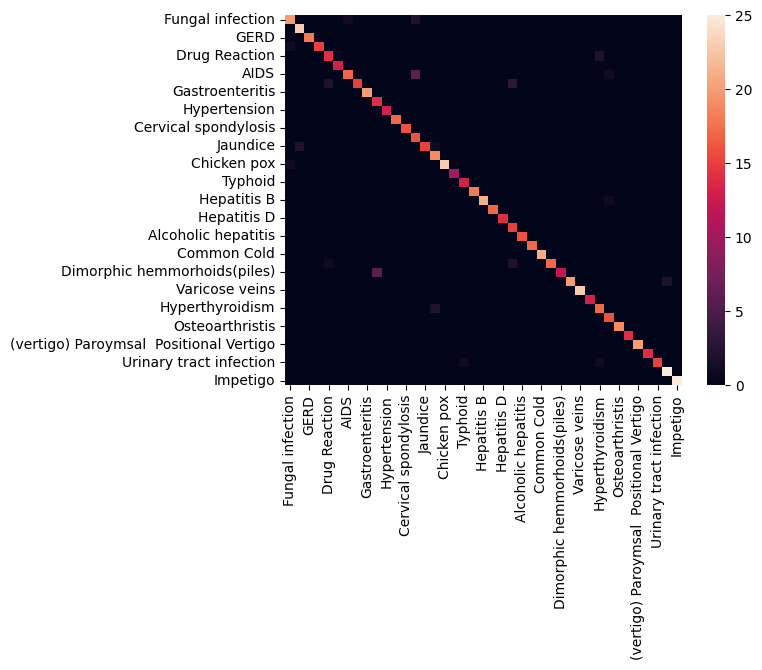

In [54]:
#Checking the accuracy of the model

conf_mat = confusion_matrix(y_test, preds)
dataset1_cm = pd.DataFrame(conf_mat, index=dataset1['Disease'].unique(), columns=dataset1['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(dataset1_cm)

In [55]:
#Splitting the data and training the GaussianNB using the same split 

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = GaussianNB()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(4182, 17) (738, 17) (4182,) (738,)
['Hypothyroidism' 'Arthritis' 'Hypertension' 'hepatitis A' 'Dengue'
 'Tuberculosis' 'Common Cold' 'Malaria'
 '(vertigo) Paroymsal  Positional Vertigo' 'Fungal infection' 'Pneumonia'
 'Hypoglycemia' 'Hepatitis E' 'Psoriasis' 'Hepatitis D' 'Heart attack'
 'Jaundice' 'Pneumonia' 'Dengue' 'Heart attack' 'Varicose veins'
 'Chicken pox' 'Osteoarthristis' 'Hepatitis C' 'Pneumonia' 'Migraine'
 'Varicose veins' 'Osteoarthristis' 'Drug Reaction' 'Hepatitis C'
 'Fungal infection' 'Dengue' 'Chicken pox' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Common Cold' 'Gastroenteritis'
 'Dimorphic hemmorhoids(piles)' 'Allergy' 'Hypoglycemia' 'Psoriasis'
 'Bronchial Asthma' 'Hypertension' 'Bronchial Asthma' 'Hepatitis D'
 'Common Cold' 'Hepatitis B' 'Paralysis (brain hemorrhage)' 'Hepatitis D'
 'Migraine' 'Hepatitis D' 'Heart attack' 'Jaundice' 'Allergy'
 'Fungal infection' 'Psoriasis' 'Typhoid' 'Hepatitis C' 'Acne'
 'Cervical spondylosis' 'Cervical spondylosis

F1-score% = 86.28450452626925 | Accuracy% = 87.53387533875339


<Axes: >

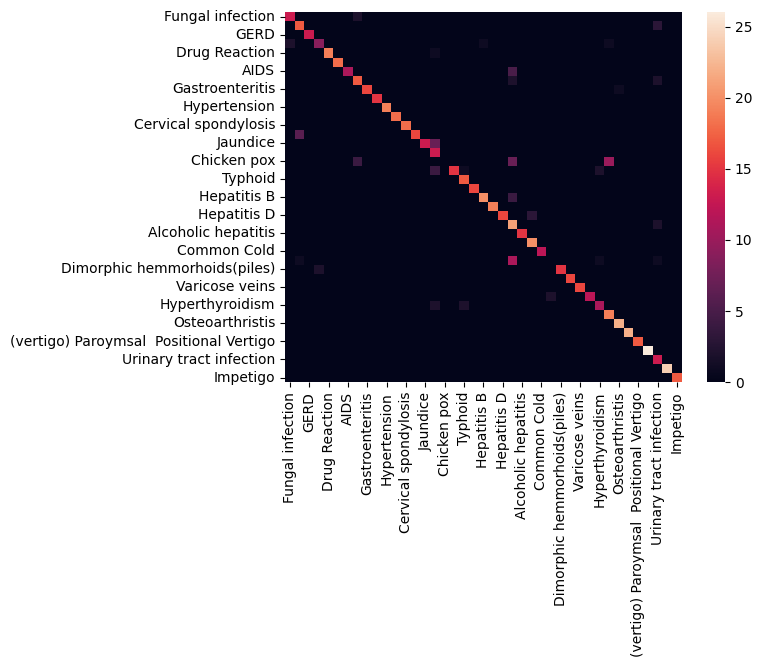

In [56]:
#Checking the accuracy of the model

conf_mat_gnb = confusion_matrix(y_test, preds)
dataset1_cm = pd.DataFrame(conf_mat_gnb, index=dataset1['Disease'].unique(), columns=dataset1['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(dataset1_cm)

In [57]:
#Splitting the data and training the LogisticRegression using the same split 

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = LogisticRegression()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(4182, 17) (738, 17) (4182,) (738,)
['Hypertension' 'Hypoglycemia' 'Paralysis (brain hemorrhage)'
 'Hepatitis B' 'Hepatitis C' 'Hepatitis D' 'Osteoarthristis'
 'Drug Reaction' '(vertigo) Paroymsal  Positional Vertigo' 'Typhoid'
 'Heart attack' 'Malaria' 'Peptic ulcer diseae' 'Hypertension' 'AIDS'
 'Hypoglycemia' 'GERD' 'Paralysis (brain hemorrhage)' 'Osteoarthristis'
 'Dengue' 'Tuberculosis' 'Migraine' 'GERD' 'Gastroenteritis' 'Hepatitis D'
 'Hypothyroidism' 'Typhoid' 'Paralysis (brain hemorrhage)' 'Common Cold'
 'hepatitis A' 'Varicose veins' 'Osteoarthristis' 'Varicose veins'
 'Hypoglycemia' 'Peptic ulcer diseae' 'Hypertension' 'GERD'
 'Paralysis (brain hemorrhage)' 'Heart attack' 'Migraine'
 'Dimorphic hemmorhoids(piles)' 'Urinary tract infection'
 '(vertigo) Paroymsal  Positional Vertigo' 'Fungal infection' 'Diabetes'
 'Hepatitis D' 'Heart attack' 'Acne' 'Hepatitis B' 'Psoriasis'
 'Varicose veins' 'Migraine' 'Paralysis (brain hemorrhage)'
 'Osteoarthristis' 'Dengue' 'Chronic choles

C:\Users\briff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score% = 90.39880546690543 | Accuracy% = 90.78590785907859


<Axes: >

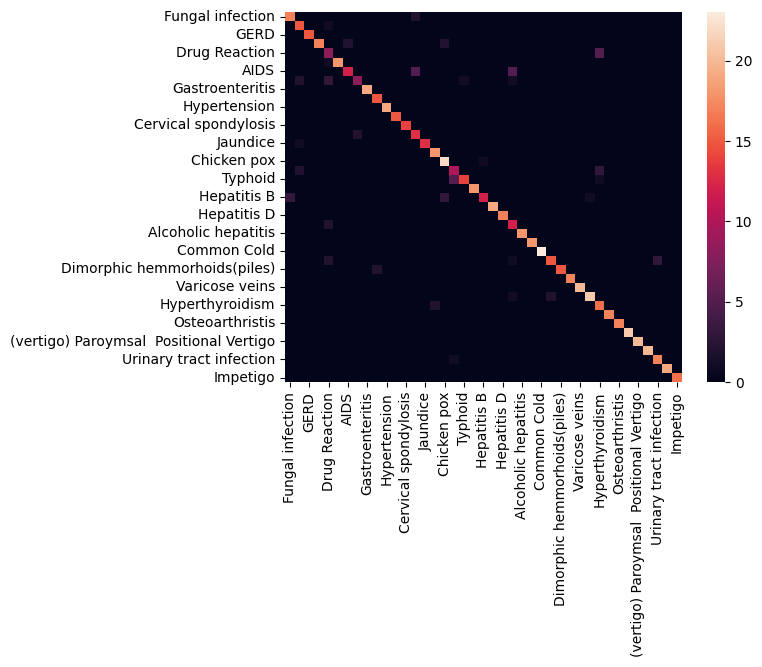

In [58]:
#Checking the accuracy of the model

conf_mat_log = confusion_matrix(y_test, preds)
dataset1_cm = pd.DataFrame(conf_mat_log, index=dataset1['Disease'].unique(), columns=dataset1['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(dataset1_cm)

In [59]:
#Splitting the data and training the Random Forest Classifier using the same split 

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = RandomForestClassifier()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(4182, 17) (738, 17) (4182,) (738,)
['Hypothyroidism' 'Hepatitis E' 'Malaria' 'Acne' 'Allergy' 'Hepatitis B'
 'Drug Reaction' 'Bronchial Asthma' 'Alcoholic hepatitis'
 'Peptic ulcer diseae' 'Hypoglycemia' 'Dengue' 'Pneumonia' 'Arthritis'
 'hepatitis A' 'Osteoarthristis' 'Hyperthyroidism' 'Jaundice' 'Migraine'
 'Impetigo' 'Varicose veins' 'Varicose veins' 'Jaundice' 'Hyperthyroidism'
 'Hypertension' 'Hypothyroidism' 'Chronic cholestasis'
 'Chronic cholestasis' 'Varicose veins' 'Hypothyroidism' 'Gastroenteritis'
 'Hepatitis C' 'Drug Reaction' 'Tuberculosis' 'Arthritis' 'Psoriasis'
 'Bronchial Asthma' 'GERD' 'Malaria' 'Fungal infection' 'Hypoglycemia'
 'Peptic ulcer diseae' 'Bronchial Asthma' 'Paralysis (brain hemorrhage)'
 'Chicken pox' 'AIDS' 'Allergy' 'Paralysis (brain hemorrhage)' 'Malaria'
 'Paralysis (brain hemorrhage)' 'Typhoid' 'Migraine' 'Pneumonia'
 'Hypoglycemia' 'AIDS' 'Acne' 'GERD' 'Hepatitis D' 'Pneumonia'
 'Paralysis (brain hemorrhage)' 'Arthritis' 'Migraine' 'Hyperthyroidi

F1-score% = 99.42776315358317 | Accuracy% = 99.45799457994579


<Axes: >

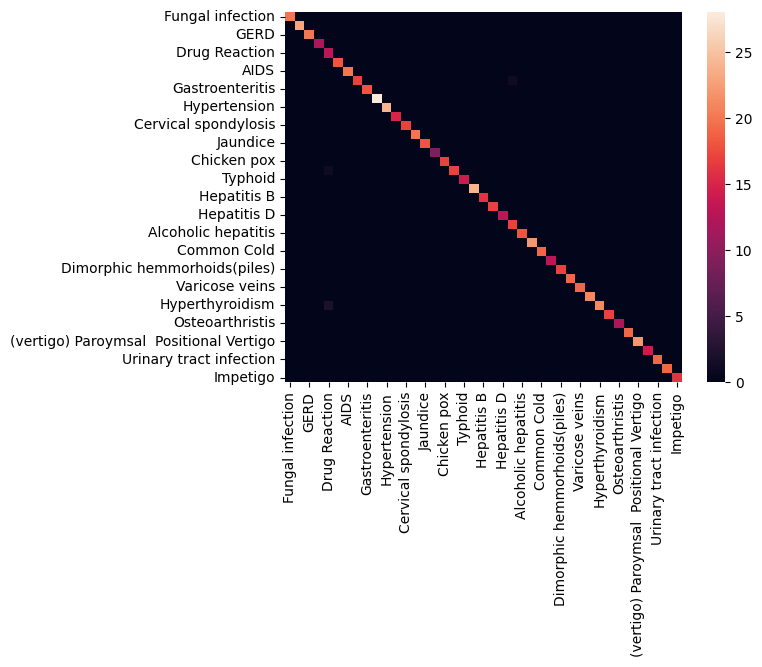

In [60]:
conf_mat_rf = confusion_matrix(y_test, preds)
dataset1_cm = pd.DataFrame(conf_mat_rf, index=dataset1['Disease'].unique(), columns=dataset1['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(dataset1_cm)

In [61]:
#Splitting the data and training the model this time with 70/30 split ratio

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.70)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(3444, 17) (1476, 17) (3444,) (1476,)
['Acne' 'Hypertension' 'Jaundice' ... 'Impetigo' 'Migraine'
 'Chronic cholestasis']


F1-score% = 92.80500711596315 | Accuracy% = 92.81842818428184


<Axes: >

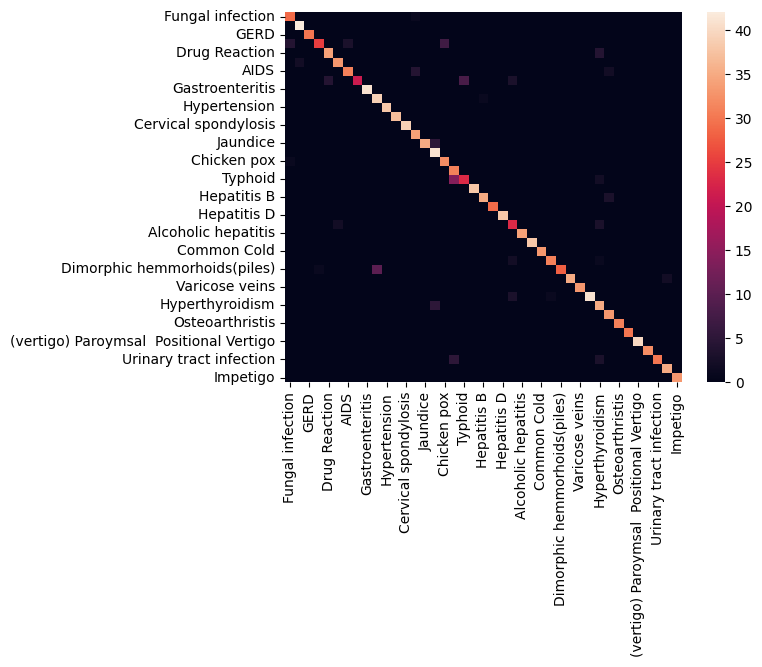

In [62]:
#Checking the accuracy of the model

conf_mat = confusion_matrix(y_test, preds)
dataset1_cm = pd.DataFrame(conf_mat, index=dataset1['Disease'].unique(), columns=dataset1['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(dataset1_cm)

In [63]:
#Splitting the data and training the GaussianNB using the split 70/30

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.70)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = GaussianNB()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(3444, 17) (1476, 17) (3444,) (1476,)
['Psoriasis' 'Chronic cholestasis' 'Peptic ulcer diseae' ...
 'Chronic cholestasis' 'Hypertension' 'Acne']


F1-score% = 85.87476084370974 | Accuracy% = 86.51761517615176


<Axes: >

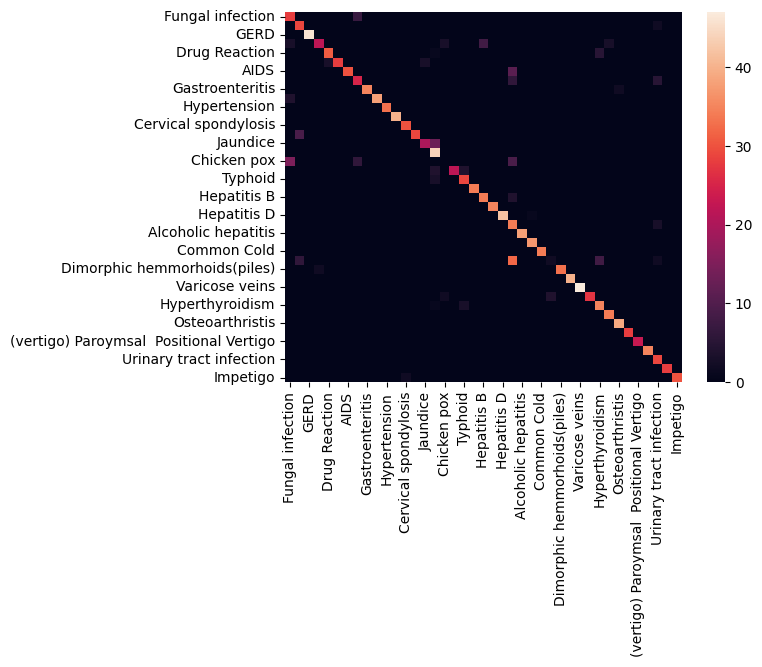

In [64]:
#Checking the accuracy of the model

conf_mat_gnb = confusion_matrix(y_test, preds)
dataset1_cm = pd.DataFrame(conf_mat_gnb, index=dataset1['Disease'].unique(), columns=dataset1['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(dataset1_cm)

In [65]:
#Splitting the data and training the Logistic Regression using the split 70/30

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.70)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = LogisticRegression()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(3444, 17) (1476, 17) (3444,) (1476,)
['Pneumonia' 'Hepatitis C' 'Pneumonia' ... 'Allergy' 'Hepatitis B'
 'Hepatitis B']


C:\Users\briff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score% = 91.27794670650835 | Accuracy% = 91.39566395663957


<Axes: >

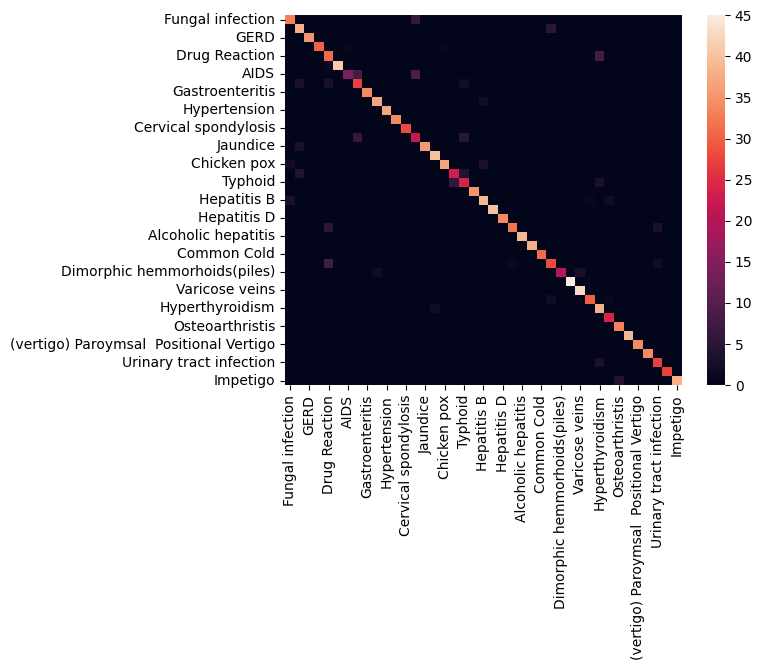

In [66]:
#Checking the accuracy of the model

conf_mat_log = confusion_matrix(y_test, preds)
dataset1_cm = pd.DataFrame(conf_mat_log, index=dataset1['Disease'].unique(), columns=dataset1['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(dataset1_cm)

In [67]:
#Splitting the data and training the Random Forest using the split 70/30

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.70)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = RandomForestClassifier()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(3444, 17) (1476, 17) (3444,) (1476,)
['Hepatitis E' 'Malaria' '(vertigo) Paroymsal  Positional Vertigo' ...
 'Common Cold' 'Peptic ulcer diseae' 'Dengue']


F1-score% = 99.44344516123196 | Accuracy% = 99.45799457994579


<Axes: >

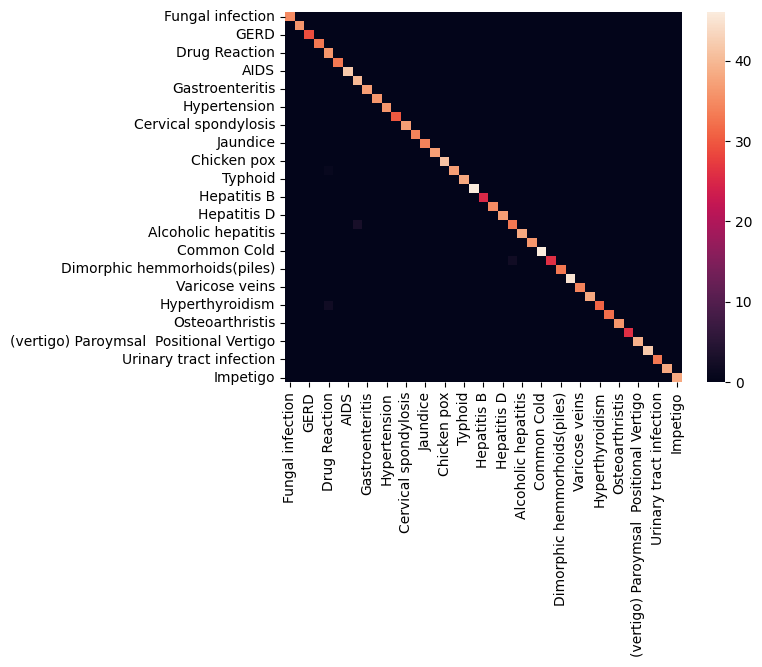

In [68]:
#Checking the accuracy of the model

conf_mat_rf = confusion_matrix(y_test, preds)
dataset1_cm = pd.DataFrame(conf_mat_rf, index=dataset1['Disease'].unique(), columns=dataset1['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(dataset1_cm)

In [69]:
#Splitting the data and training the SVC using the split 80/20

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.80)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(3936, 17) (984, 17) (3936,) (984,)
['Varicose veins' 'Gastroenteritis' 'Hepatitis D' 'Chicken pox' 'Allergy'
 'Bronchial Asthma' 'Osteoarthristis' 'Hypoglycemia' 'Pneumonia'
 'Osteoarthristis' 'Alcoholic hepatitis' 'Hypothyroidism'
 'Urinary tract infection' 'Hyperthyroidism' 'Hepatitis E' 'hepatitis A'
 'Chicken pox' 'hepatitis A' 'Arthritis' 'hepatitis A' 'Varicose veins'
 'Varicose veins' 'Heart attack' '(vertigo) Paroymsal  Positional Vertigo'
 'Hepatitis D' 'Hepatitis E' 'Acne' 'Urinary tract infection'
 'Varicose veins' 'Arthritis' 'Dengue' 'Hepatitis C' 'Common Cold'
 'Bronchial Asthma' 'Paralysis (brain hemorrhage)' 'Dengue'
 'Hyperthyroidism' 'Hypertension' 'Diabetes' 'Varicose veins'
 'Alcoholic hepatitis' 'Osteoarthristis' 'Hepatitis D' 'Hepatitis D'
 'Psoriasis' 'Chicken pox' 'GERD' 'Paralysis (brain hemorrhage)'
 'Jaundice' 'Psoriasis' 'Hypoglycemia' 'Acne' 'Varicose veins' 'AIDS'
 'Hepatitis E' 'Psoriasis' '(vertigo) Paroymsal  Positional Vertigo'
 'Gastroenteritis' 'Fun

F1-score% = 93.12457798162028 | Accuracy% = 93.69918699186992


<Axes: >

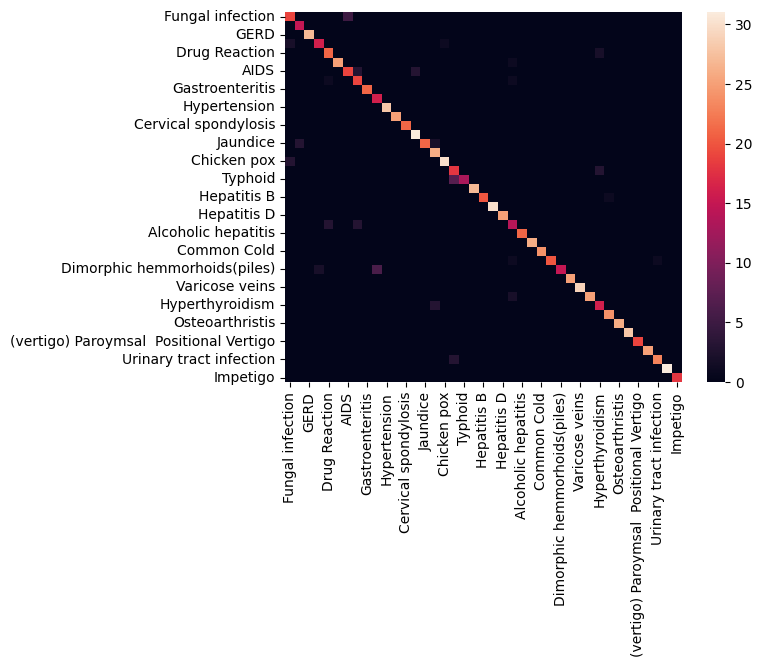

In [70]:
#Checking the accuracy of the model

conf_mat = confusion_matrix(y_test, preds)
dataset1_cm = pd.DataFrame(conf_mat, index=dataset1['Disease'].unique(), columns=dataset1['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(dataset1_cm)

In [71]:
#Splitting the data and training the GaussianNB using the split 80/20

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.80)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = GaussianNB()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(3936, 17) (984, 17) (3936,) (984,)
['Psoriasis' 'Urinary tract infection' 'Tuberculosis' 'Pneumonia'
 'Bronchial Asthma' 'Allergy' 'hepatitis A' 'Hypertension'
 'Varicose veins' 'Dengue' 'Cervical spondylosis' 'Varicose veins'
 'Varicose veins' 'AIDS' 'Paralysis (brain hemorrhage)' 'Jaundice'
 'Varicose veins' 'Chicken pox' 'Tuberculosis' 'Hypothyroidism'
 'Paralysis (brain hemorrhage)' 'Hepatitis B' 'AIDS' 'Hepatitis D'
 'Varicose veins' 'Hypertension' 'Hypertension'
 'Paralysis (brain hemorrhage)' 'Hepatitis B' 'Hepatitis E'
 'Bronchial Asthma' 'Heart attack' 'Diabetes' 'Hypoglycemia'
 'Hypertension' 'Alcoholic hepatitis' 'Jaundice' 'Diabetes' 'Heart attack'
 'Diabetes' 'Paralysis (brain hemorrhage)' 'Alcoholic hepatitis' 'Typhoid'
 'Hepatitis C' 'Arthritis' 'Malaria' 'Diabetes' 'Hypoglycemia' 'Migraine'
 'Hypoglycemia' 'Peptic ulcer diseae' 'Hepatitis B' 'Cervical spondylosis'
 'Hypothyroidism' 'Drug Reaction' 'Hepatitis E' 'Arthritis'
 'Fungal infection' 'Osteoarthristis' 'Cervica

F1-score% = 86.9333992987555 | Accuracy% = 88.00813008130082


<Axes: >

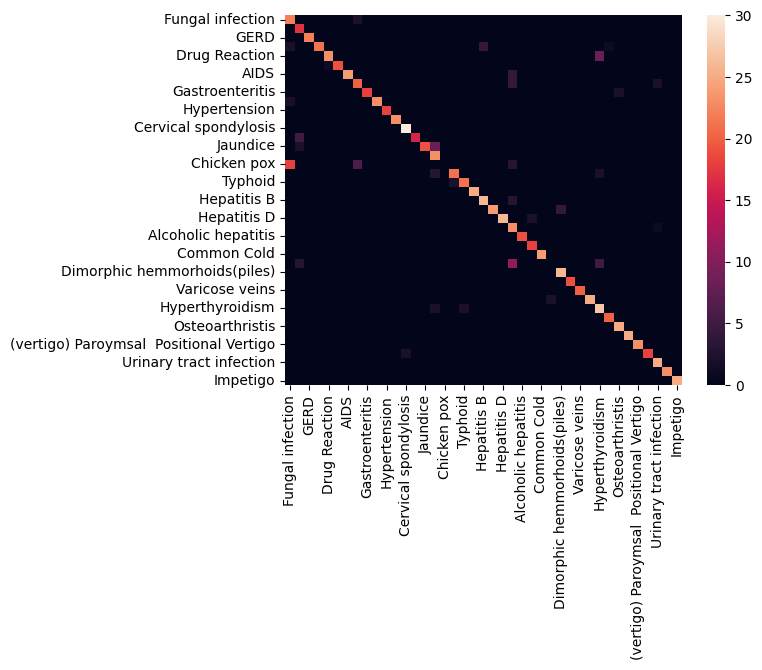

In [72]:
#Checking the accuracy of the model

conf_mat_gnb = confusion_matrix(y_test, preds)
dataset1_cm = pd.DataFrame(conf_mat_gnb, index=dataset1['Disease'].unique(), columns=dataset1['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(dataset1_cm)

In [73]:
#Splitting the data and training the LogisticRegression using the split 80/20

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.80)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = LogisticRegression()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(3936, 17) (984, 17) (3936,) (984,)
['Urinary tract infection' 'Gastroenteritis' 'Hepatitis E' 'Hypoglycemia'
 'Hypertension' 'AIDS' 'GERD' 'Psoriasis' 'GERD' 'Pneumonia'
 'Varicose veins' '(vertigo) Paroymsal  Positional Vertigo'
 'Peptic ulcer diseae' 'Dengue' 'AIDS' 'Paralysis (brain hemorrhage)'
 'Arthritis' 'Gastroenteritis' 'Allergy' 'Dimorphic hemmorhoids(piles)'
 'hepatitis A' '(vertigo) Paroymsal  Positional Vertigo' 'Hepatitis E'
 'Tuberculosis' 'Drug Reaction' 'Psoriasis' 'Paralysis (brain hemorrhage)'
 'Varicose veins' 'Chicken pox' 'AIDS' 'Arthritis' 'GERD' 'Impetigo'
 'AIDS' 'Common Cold' 'Hypothyroidism' 'AIDS' 'Common Cold' 'Hepatitis D'
 'Hyperthyroidism' 'Gastroenteritis' 'Hypothyroidism' 'Hypothyroidism'
 'Drug Reaction' 'Hepatitis D' 'Tuberculosis' 'Impetigo' 'Jaundice'
 'Cervical spondylosis' 'Bronchial Asthma' 'Bronchial Asthma'
 'Gastroenteritis' 'Gastroenteritis' 'Allergy' 'Hypoglycemia'
 'Hypertension' 'Alcoholic hepatitis' 'Drug Reaction' 'Hepatitis D'
 'Dengu

C:\Users\briff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score% = 91.39723494804606 | Accuracy% = 91.05691056910568


<Axes: >

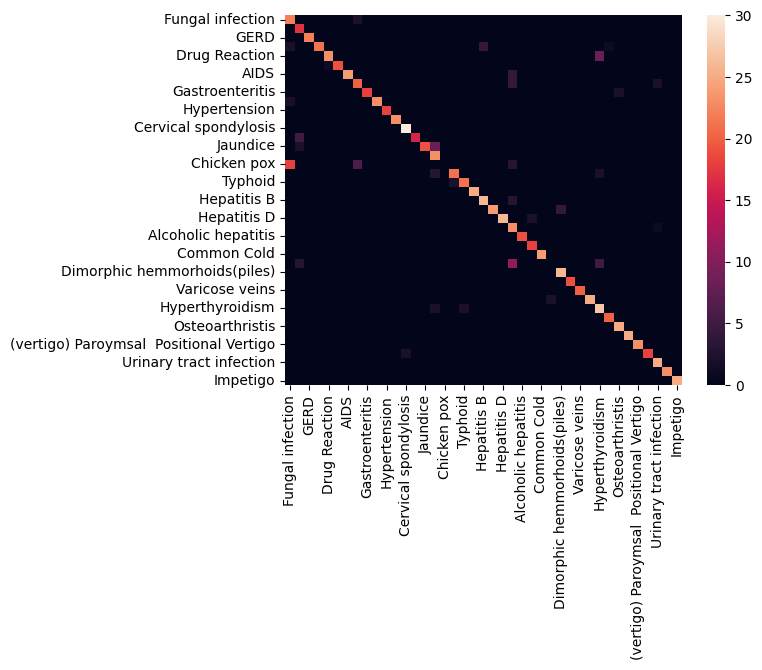

In [74]:
#Checking the accuracy of the model

conf_mat_log = confusion_matrix(y_test, preds)
dataset1_cm = pd.DataFrame(conf_mat_gnb, index=dataset1['Disease'].unique(), columns=dataset1['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(dataset1_cm)

In [75]:
#Splitting the data and training the Random Forest using the split 80/20

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.80)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = RandomForestClassifier()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(3936, 17) (984, 17) (3936,) (984,)
['Paralysis (brain hemorrhage)' 'GERD' 'Peptic ulcer diseae' 'Hepatitis C'
 'Drug Reaction' 'Drug Reaction' 'Hepatitis D' 'Heart attack' 'Pneumonia'
 'AIDS' 'Acne' 'Gastroenteritis' 'Paralysis (brain hemorrhage)'
 'Paralysis (brain hemorrhage)' 'Tuberculosis' 'Allergy' 'Heart attack'
 'Gastroenteritis' 'Hypoglycemia' 'GERD' 'Fungal infection'
 'Hypothyroidism' 'Arthritis' 'Hypertension' 'Urinary tract infection'
 'Paralysis (brain hemorrhage)' 'Dimorphic hemmorhoids(piles)'
 'Fungal infection' 'Psoriasis' 'Heart attack' 'Allergy' 'Malaria'
 'Osteoarthristis' 'Alcoholic hepatitis' 'Heart attack' 'Chicken pox'
 'Migraine' 'Hepatitis E' 'Common Cold' 'Hypertension' 'Diabetes'
 'Alcoholic hepatitis' 'Dengue' 'Typhoid' 'Impetigo' 'Acne'
 '(vertigo) Paroymsal  Positional Vertigo' 'GERD' 'Dengue'
 'Osteoarthristis' 'Alcoholic hepatitis' 'Drug Reaction'
 '(vertigo) Paroymsal  Positional Vertigo' 'Alcoholic hepatitis' 'Dengue'
 'Fungal infection' 'Hyperthyroi

F1-score% = 99.42900243552626 | Accuracy% = 99.49186991869918


<Axes: >

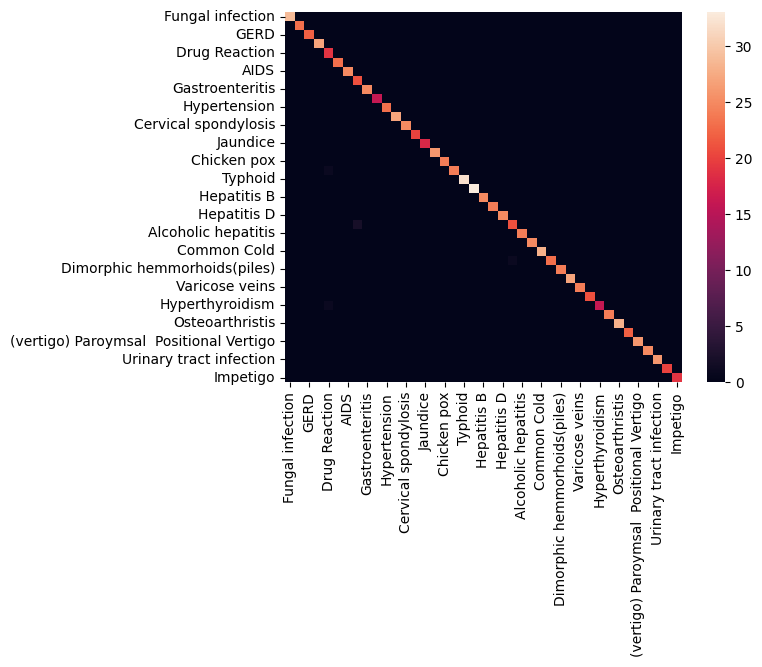

In [76]:
#Checking the accuracy of the model

conf_mat_rf = confusion_matrix(y_test, preds)
dataset1_cm = pd.DataFrame(conf_mat_rf, index=dataset1['Disease'].unique(), columns=dataset1['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(dataset1_cm)